In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('train.csv')

In [7]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [11]:
#id	                       Unique ID for the customer
#Gender	                   Gender of the customer
#Age	                   Age of the customer
#Driving_License	       0 : Customer does not have DL, 1 : Customer already has DL
#Region_Code	           Unique code for the region of the customer
#Previously_Insured	       1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
#Vehicle_Age	           Age of the Vehicle
#Vehicle_Damage	           1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
#Annual_Premium	           The amount customer needs to pay as premium in the year
#Policy_Sales_Channel	   Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
#Vintage	               Number of Days, Customer has been associated with the company
#Response	               1 : Customer is interested, 0 : Customer is not interestedinterested

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [27]:
data.shape

(381109, 12)

In [35]:
data.isna().count()

id                      381109
Gender                  381109
Age                     381109
Driving_License         381109
Region_Code             381109
Previously_Insured      381109
Vehicle_Age             381109
Vehicle_Damage          381109
Annual_Premium          381109
Policy_Sales_Channel    381109
Vintage                 381109
Response                381109
dtype: int64

In [58]:
testdata = pd.read_csv('test.csv')

In [60]:
testdata

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [62]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [64]:
testdata.isna().count()

id                      127037
Gender                  127037
Age                     127037
Driving_License         127037
Region_Code             127037
Previously_Insured      127037
Vehicle_Age             127037
Vehicle_Damage          127037
Annual_Premium          127037
Policy_Sales_Channel    127037
Vintage                 127037
dtype: int64

There are no null values in the both datasets. Lets conver the object data into numerical data

In [67]:
data['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [69]:
testdata['Gender'].value_counts()

Male      68236
Female    58801
Name: Gender, dtype: int64

In [75]:
def Gender(gen):
    if gen == 'Female':
        return 1
    else:
        return 0
data['Gender'] = data['Gender'].apply(Gender)
testdata['Gender'] = testdata['Gender'].apply(Gender)

In [77]:
data['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [79]:
testdata['Vehicle_Age'].value_counts()

1-2 Year     66699
< 1 Year     55019
> 2 Years     5319
Name: Vehicle_Age, dtype: int64

In [81]:
def VehicleAge(age):
    if age == '< 1 Year':
        return 0
    elif age == '1-2 Year':
        return 1
    else:
        return 2
data['Vehicle_Age'] = data['Vehicle_Age'].apply(VehicleAge)
testdata['Vehicle_Age'] = testdata['Vehicle_Age'].apply(VehicleAge)

In [83]:
data['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [85]:
testdata['Vehicle_Damage'].value_counts()

Yes    63835
No     63202
Name: Vehicle_Damage, dtype: int64

In [87]:
def VehicleDamage(damage):
    if damage == 'Yes':
        return 1
    else:
        return 0
data['Vehicle_Damage'] = data['Vehicle_Damage'].apply(VehicleDamage)
testdata['Vehicle_Damage'] = testdata['Vehicle_Damage'].apply(VehicleDamage)

In [106]:
data.drop('id', axis=1, inplace = True)

In [108]:
testdata.drop('id', axis=1, inplace= True)

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [126]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing

In [128]:
numCols = ['Age','Region_Code', 'Policy_Sales_Channel', 'Vintage' ]
scaler = StandardScaler()
data[numCols] = scaler.fit_transform(data[numCols])

In [130]:
scalerM = MinMaxScaler()
data[["Annual_Premium"]] = scalerM.fit_transform(data[["Annual_Premium"]])

In [132]:
x = data.drop(['Response'], axis = 1)
y = data['Response']

In [134]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.4, random_state = 42 )

In [136]:
model = KNeighborsClassifier(n_neighbors = 1, weights = "uniform")
model.fit(xTrain,yTrain)
y_pred = model.predict(xTest)
accuracy_score(yTest, y_pred)

0.8253981790034374

In [138]:
param_grid = { 'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

grid = GridSearchCV(model,param_grid,refit=True)
grid.fit(xTrain,yTrain)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]})

In [140]:
grid.best_params_

{'n_neighbors': 14}

In [142]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=14)

In [144]:
pred=grid.predict(xTest)

In [146]:
accuracy_score(yTest,pred)

0.8720644958148566

In [148]:
acc=[]

for i in range(1,15):
  model = KNeighborsClassifier(n_neighbors = i, weights = "uniform")
  model.fit(xTrain,yTrain)
  y_pred = model.predict(xTest)
  score=accuracy_score(yTest, y_pred)
  acc.append(score)


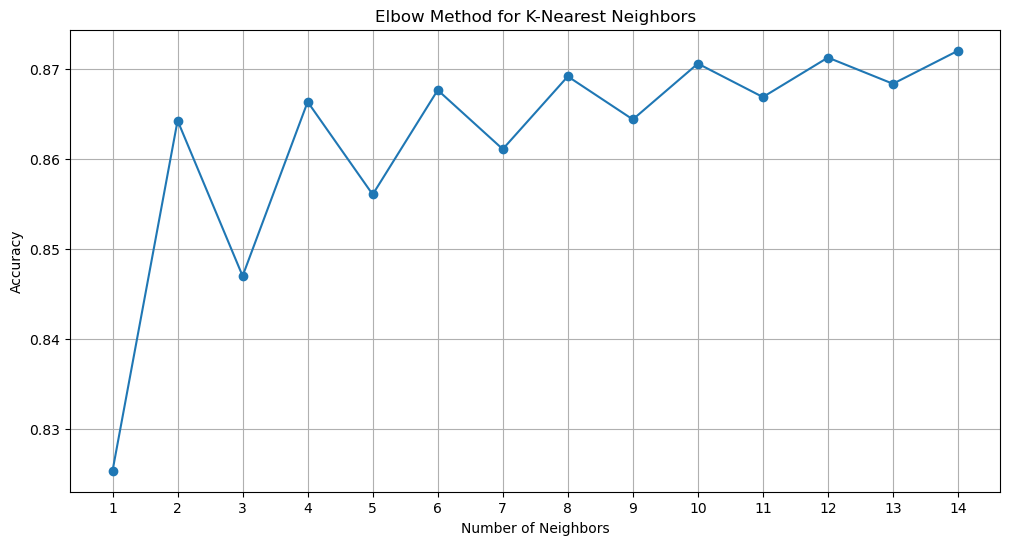

In [150]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), acc, marker='o')
plt.title('Elbow Method for K-Nearest Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(range(1, 15))
plt.grid(True)
plt.show()

In [152]:
# 8 is better value for this model

model = KNeighborsClassifier(n_neighbors = 8, weights = "uniform")
model.fit(xTrain,yTrain)
y_pred = model.predict(xTest)
accuracy_score(yTest, y_pred)

0.8692109889533206